the objective of this notebook is to examine the likelihood functional form of the group multiplicity function. to do so, I will generate a series of mock galaxy catalogs using halotools, then look at the likelihood function using the mock catalogs. 

In [42]:
import os
import numpy as np
import pickle

import env
import util as UT

In [8]:
from halotools.sim_manager import CachedHaloCatalog
from halotools.empirical_models import PrebuiltHodModelFactory
from halotools.empirical_models.factories.mock_helpers import three_dim_pos_bundle
from halotools.mock_observables import FoFGroups
from astropy.table import Table

In [22]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [9]:
def edge(index):
    zi = (index / 25) * 200.
    i2 = index % 25
    yi = (i2 / 5) * 200.
    i3 = i2 % 5
    xi = (i3) * 200.
    return xi , yi , zi

def mask_galaxy_table(pos , subvol_index):
    xi , yi , zi  = edge(subvol_index)
    submask = np.where((xi <pos[:, 0]) * \
                       (pos[:, 0] < xi + 200) * \
                       (yi <pos[:, 1]) * \
                       (pos[:, 1] < yi + 200) * \
                       (zi <pos[:, 2]) *  \
                       (pos[:, 2] < zi + 200))
    return pos[submask]

In [15]:
def richness(group_id):
    '''Calculate the richness of a group given group_ids of galaxies. Uses astropy.table module
    '''
    gals = Table()
    gals['groupid'] = group_id
    gals['dummy'] = 1
    grouped_table = gals.group_by('groupid')
    grp_richness = grouped_table['dummy'].groups.aggregate(np.sum)
    return np.array(grp_richness)

In [16]:
model = PrebuiltHodModelFactory('zheng07', threshold=-21)
halocat = CachedHaloCatalog(simname='multidark', redshift=0, halo_finder='rockstar')

In [26]:
b_perp = 0.14
b_para = 0.75
gmf_bins = np.array([5,7,10,14,20,28,40])

In [32]:
gmf_file = ''.join([UT.dat_dir(), 'submultidark.gmf.p'])
if os.path.isfile(gmf_file): 
    gmf_dict = pickle.load(open(gmf_file, 'rb'))
    gmfs = gmf_dict['gmfs']
else: 
    nbars, gmfs = [], []
    for i in range(1, 125): 
        print 'mock #', i
        model.populate_mock(halocat) # populate the halo catalog
        pos = three_dim_pos_bundle(model.mock.galaxy_table, 'x', 'y', 'z')
        pos = mask_galaxy_table(pos , i)
    
        nbars.append(len(pos) / 200**3.)
        groups = FoFGroups(pos, b_perp, b_para, period=200)
        gmf_i = np.histogram(richness(groups.group_ids), gmf_bins)[0]/200.**3
        gmfs.append(gmf_i)
    
    # save gmfs to file 
    gmf_dict = {'gmf_bins': gmf_bins, 'gmfs': gmfs}
    pickle.dump(gmf_dict, open(, 'wb'))

mock # 1
mock # 2
mock # 3
mock # 4
mock # 5
mock # 6
mock # 7
mock # 8
mock # 9
mock # 10
mock # 11
mock # 12
mock # 13
mock # 14
mock # 15
mock # 16
mock # 17
mock # 18
mock # 19
mock # 20
mock # 21
mock # 22
mock # 23
mock # 24
mock # 25
mock # 26
mock # 27
mock # 28
mock # 29
mock # 30
mock # 31
mock # 32
mock # 33
mock # 34
mock # 35
mock # 36
mock # 37
mock # 38
mock # 39
mock # 40
mock # 41
mock # 42
mock # 43
mock # 44
mock # 45
mock # 46
mock # 47
mock # 48
mock # 49
mock # 50
mock # 51
mock # 52
mock # 53
mock # 54
mock # 55
mock # 56
mock # 57
mock # 58
mock # 59
mock # 60
mock # 61
mock # 62
mock # 63
mock # 64
mock # 65
mock # 66
mock # 67
mock # 68
mock # 69
mock # 70
mock # 71
mock # 72
mock # 73
mock # 74
mock # 75
mock # 76
mock # 77
mock # 78
mock # 79
mock # 80
mock # 81
mock # 82
mock # 83
mock # 84
mock # 85
mock # 86
mock # 87
mock # 88
mock # 89
mock # 90
mock # 91
mock # 92
mock # 93
mock # 94
mock # 95
mock # 96
mock # 97
mock # 98
mock # 99
mock # 100
mock # 1

124


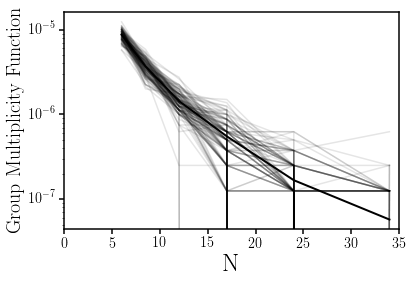

In [34]:
fig = plt.figure()
sub = fig.add_subplot(111)
print np.array(gmfs).shape[0]
for gmf in gmfs: 
    sub.plot(0.5*(gmf_bins[1:] + gmf_bins[:-1]), gmf, c='k', alpha=0.1)
sub.plot(0.5*(gmf_bins[1:] + gmf_bins[:-1]), np.sum(np.array(gmfs), axis=0)/float(len(gmfs)), c='k', lw=2)
sub.set_xlim([0.,35])
sub.set_xlabel('N', fontsize=25)
sub.set_ylabel('Group Multiplicity Function', fontsize=20)
sub.set_yscale("log")

In [41]:
# save gmfs to file 
gmf_dict = {'gmf_bins': gmf_bins, 'gmfs': gmfs}
pickle.dump(gmf_dict, open(''.join([UT.dat_dir(), 'submultidark.gmf.p']), 'wb'))